In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import optuna
import xgboost as xgb
import catboost
from catboost import CatBoostRegressor
import shap

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [2]:
train_wOrdinal = pd.read_csv('~/Documents/AmesHousingML/data_cleaning/data_ordinal.csv') 
frame = train_wOrdinal.copy()

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [3]:
dataset = 'ordinal'
model_name = 'catboost'
trial = "onlyNormalCondition"
data_process = f"{dataset}_{trial}"
        

#below is filtering out the houses that sold in normal condition

frame = frame[frame['SaleCondition'] == 4]

#the features will be X (independent variables)
X = frame.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = frame['SalePrice']
y_array = y.values

# params = {'iterations': 499, 'learning_rate': 0.0875029872444346, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42} Mean R^2: 0.9491209951386228 
params = {'iterations': 434, 'learning_rate': 0.10599212903564667, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42}

#Input parameters into the model
best_model = CatBoostRegressor(**params)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')

def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Define the scoring function using neg_mean_squared_error
scorer = make_scorer(rmse_scorer)

# Use cross_val_score with the defined scorer
rmse_scores = cross_val_score(best_model, X, y, cv=kf, scoring=scorer)


0:	learn: 63524.7247502	total: 58.1ms	remaining: 25.2s
1:	learn: 59068.8715613	total: 59.3ms	remaining: 12.8s
2:	learn: 55157.1649621	total: 60.5ms	remaining: 8.69s
3:	learn: 51353.3808802	total: 61.6ms	remaining: 6.62s
4:	learn: 48117.6224998	total: 62.7ms	remaining: 5.38s
5:	learn: 45376.3256666	total: 63.8ms	remaining: 4.55s
6:	learn: 42843.8725987	total: 64.9ms	remaining: 3.96s
7:	learn: 40424.8463723	total: 66.1ms	remaining: 3.52s
8:	learn: 38321.8992819	total: 67.3ms	remaining: 3.18s
9:	learn: 36395.9183920	total: 68.2ms	remaining: 2.89s
10:	learn: 34443.9726531	total: 69.2ms	remaining: 2.66s
11:	learn: 32938.6420867	total: 70.3ms	remaining: 2.47s
12:	learn: 31448.1779066	total: 71.4ms	remaining: 2.31s
13:	learn: 30101.8409065	total: 72.4ms	remaining: 2.17s
14:	learn: 28909.0448997	total: 73.4ms	remaining: 2.05s
15:	learn: 27753.9892574	total: 74.4ms	remaining: 1.94s
16:	learn: 26876.6058046	total: 75.3ms	remaining: 1.85s
17:	learn: 26030.4335676	total: 76.3ms	remaining: 1.76s
18

In [4]:
# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores, '\n')
# Print the mean and standard deviation of the scores
print(f"Mean R^2: {cv_scores.mean()}", '\n') 

Cross-Validation Scores: [0.94550473 0.95259705 0.92558092 0.9500912  0.9519647 ] 

Mean R^2: 0.9451477191108575 



In [5]:
 #Split your training and testing sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

0:	learn: 63440.4207774	total: 1.12ms	remaining: 487ms
1:	learn: 58978.0332102	total: 2.16ms	remaining: 466ms
2:	learn: 55054.8590034	total: 3.23ms	remaining: 464ms
3:	learn: 51370.7673052	total: 4.29ms	remaining: 461ms
4:	learn: 48155.3191167	total: 5.28ms	remaining: 453ms
5:	learn: 45448.4750585	total: 6.29ms	remaining: 449ms
6:	learn: 42932.3190610	total: 7.33ms	remaining: 447ms
7:	learn: 40317.5499900	total: 8.4ms	remaining: 447ms
8:	learn: 38272.8008261	total: 9.33ms	remaining: 441ms
9:	learn: 36349.0704232	total: 10.4ms	remaining: 439ms
10:	learn: 34620.5860660	total: 11.4ms	remaining: 437ms
11:	learn: 33069.7699617	total: 12.4ms	remaining: 438ms
12:	learn: 31594.6623130	total: 13.5ms	remaining: 436ms
13:	learn: 30257.8324659	total: 14.6ms	remaining: 438ms
14:	learn: 29055.1831103	total: 15.7ms	remaining: 438ms
15:	learn: 27962.3009044	total: 16.7ms	remaining: 437ms
16:	learn: 27057.0559509	total: 17.8ms	remaining: 437ms
17:	learn: 26306.6225970	total: 18.9ms	remaining: 438ms
18:

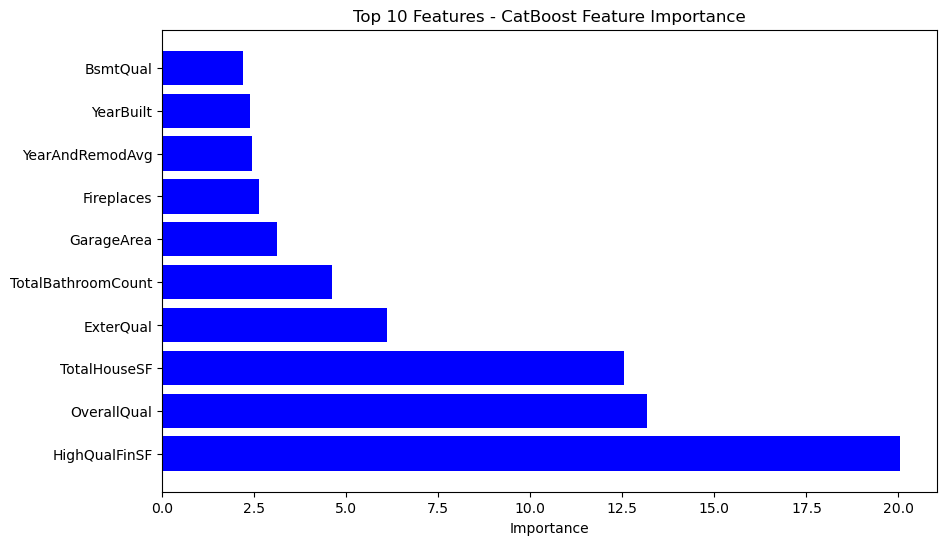

In [6]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
feature_importance = best_model.get_feature_importance()

# Get feature names from the training dataset
your_feature_names = X.columns  # Replace 'X' with your feature matrix

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({'Feature': your_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Features - CatBoost Feature Importance')
plt.show()

In [10]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_tree(tree_idx=0, pool=None, fig.size(20, 10), show_info=['InternalValue', 'LeafCount'])


SyntaxError: positional argument follows keyword argument (1362221515.py, line 2)

In [11]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_metric(iterations=None, metric='RMSE')


AttributeError: 'CatBoostRegressor' object has no attribute 'plot_metric'

In [12]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_predictions(pool=None, prediction_type='RawFormulaVal', iterations=None, aspect_ratio=0.5)


TypeError: CatBoost.plot_predictions() got an unexpected keyword argument 'pool'

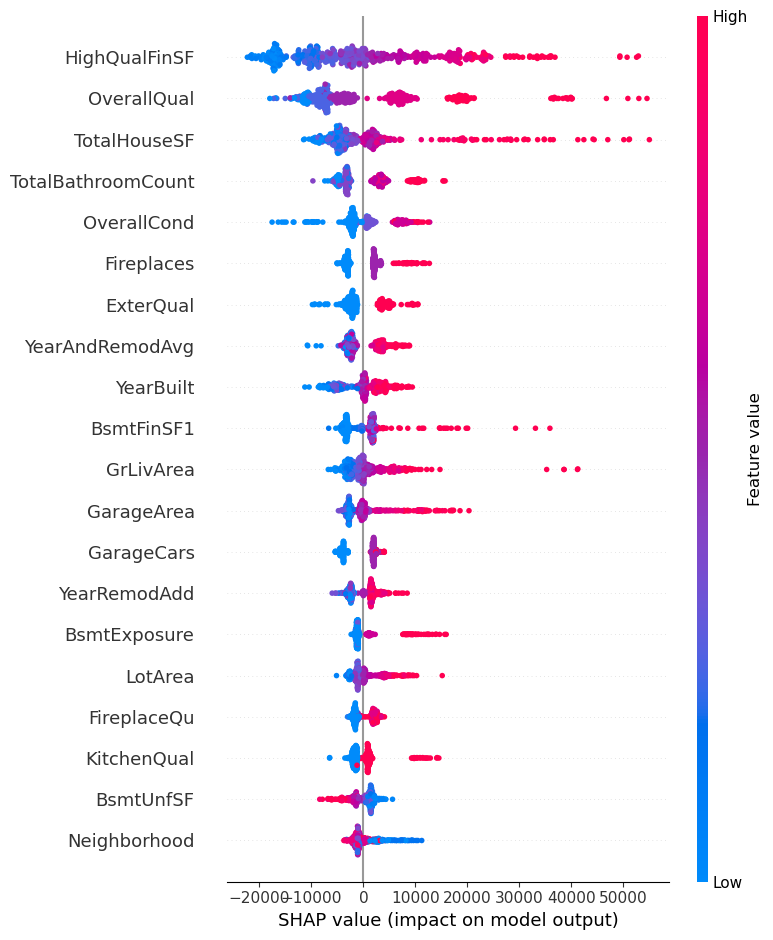

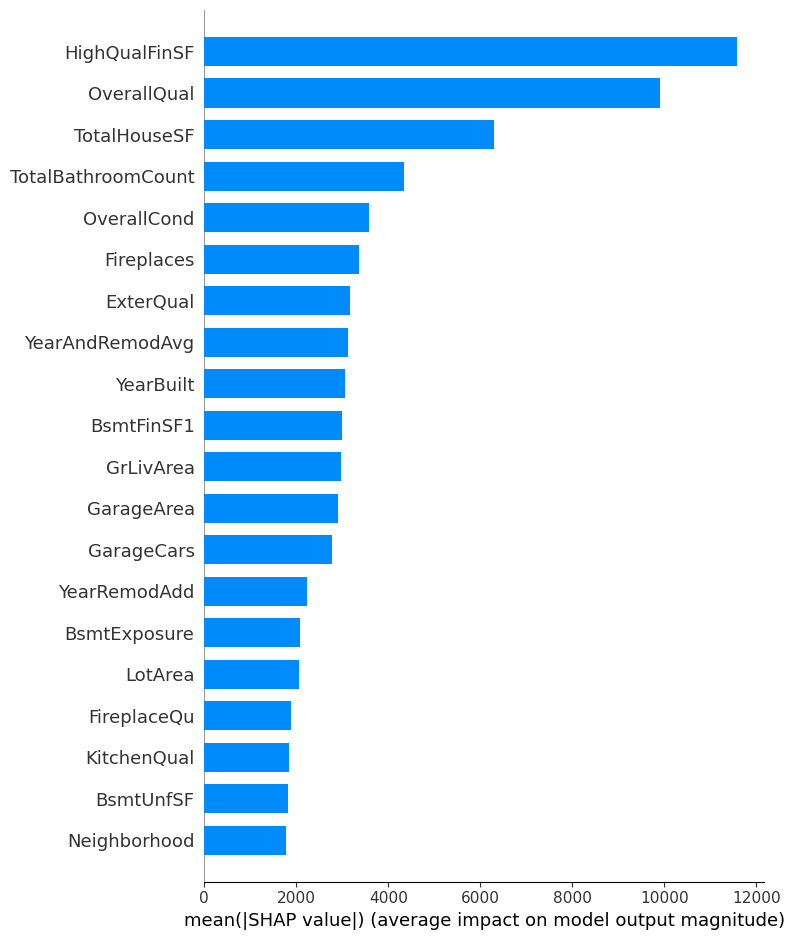

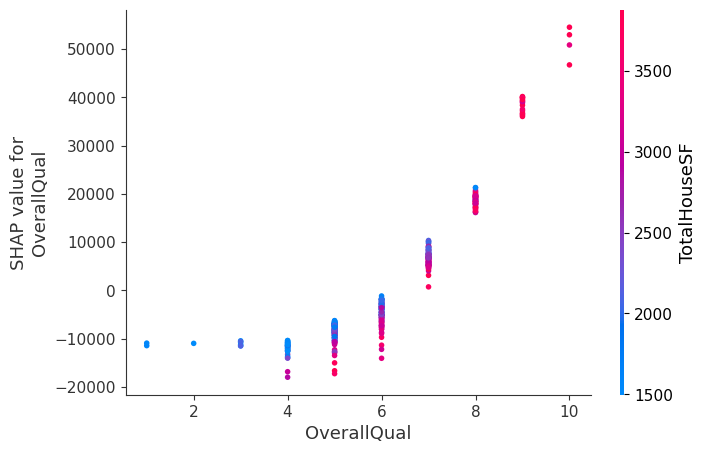

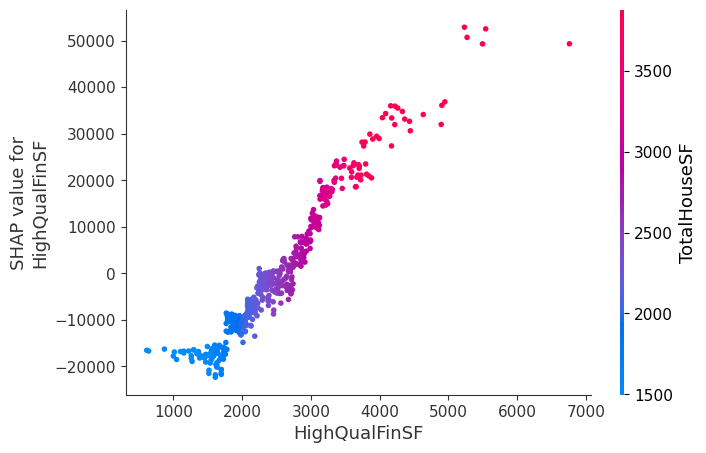

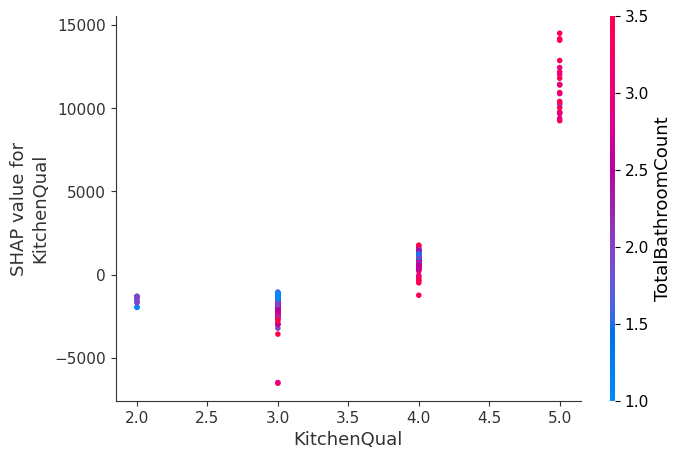

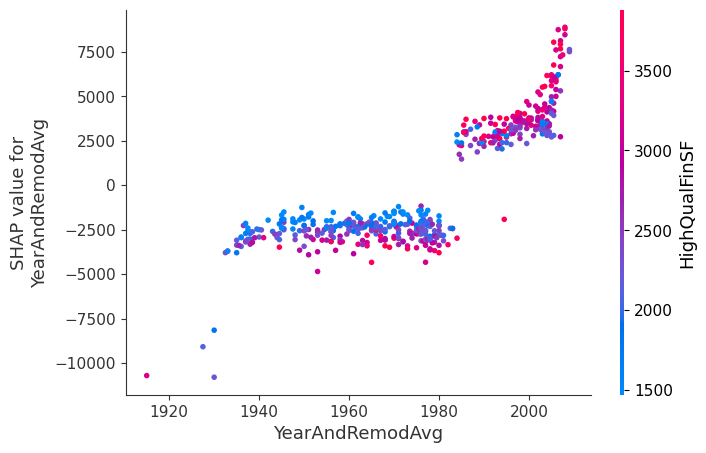

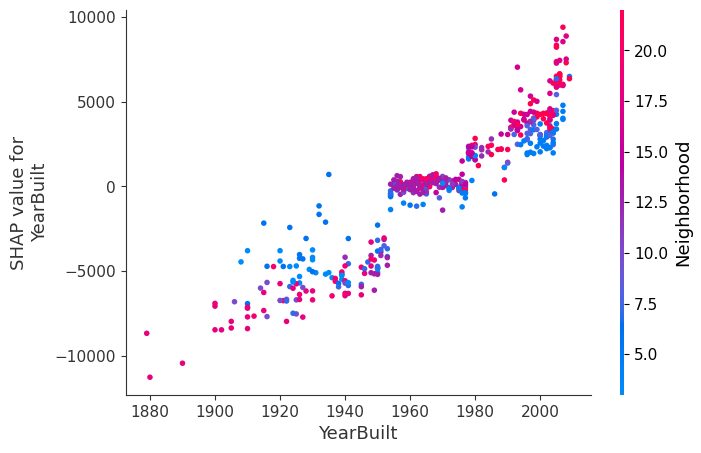

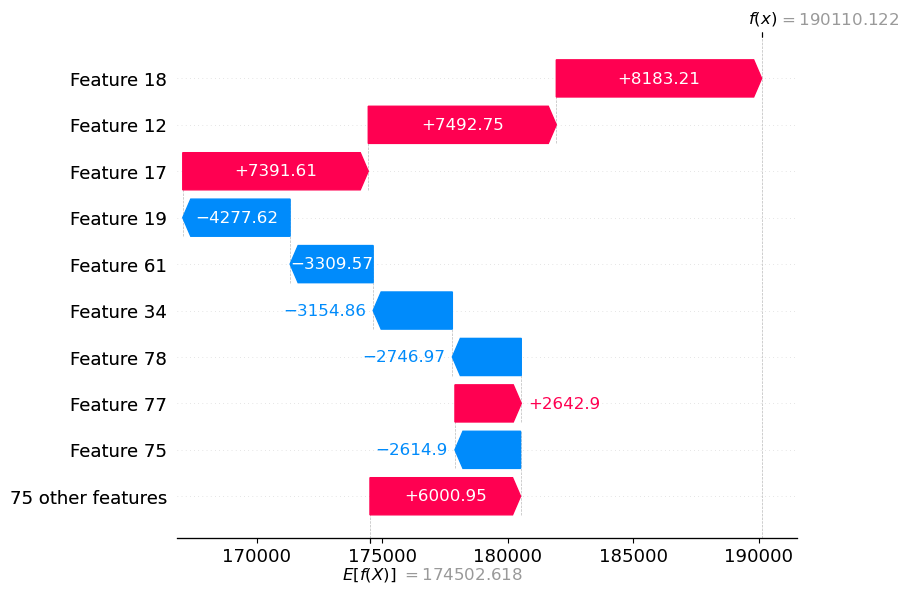

In [13]:
# Use the SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for a subset of the data (e.g., test set)
shap_values = explainer.shap_values(X_test)

# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

# 2. Summary Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 3. Dependence Plot
shap.dependence_plot("OverallQual", shap_values, X_test)
shap.dependence_plot("HighQualFinSF", shap_values, X_test)
shap.dependence_plot("KitchenQual", shap_values, X_test)
shap.dependence_plot("YearAndRemodAvg", shap_values, X_test)
shap.dependence_plot("YearBuilt", shap_values, X_test)


# 4. Force Plot (for a specific prediction)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

# 5. Waterfall Plot (for a specific prediction)
shap.waterfall_plot(shap.Explanation(values=shap_values[0, :], base_values=explainer.expected_value), max_display=10)


In [ ]:
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 500),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'depth': trial.suggest_int('depth', 4, 10),
#     }

#     model = CatBoostRegressor(**params, random_state=42)
#     model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     return mse

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# opt_params = study.best_params
# opt_model.fit(X_test,y_test)
# opt_pred = opt_model.predict(X_test)

In [ ]:
# opt_params